# DAILY DOZEN: PERSONAL DIET DIARY

**Description**: According to the Dialy Dozen, as defined by Dr. Greger, there are 11 foodgroups (and exercise) that would be ideal to consume in a day, in order to maximise health. In this project, I track my intake of those 11 foodgroups and exercise behaviour, to find insights into my own dietary patterns, that will in turn allow me to maximise health. 

Let's have a look at the recommendations first! (To see how I gathered this data, please refer to this GitHub link: https://github.com/lottedieleman/daily_dozen) 

(-1.1, 1.1, -1.099999984220544, 1.0999996686314226)

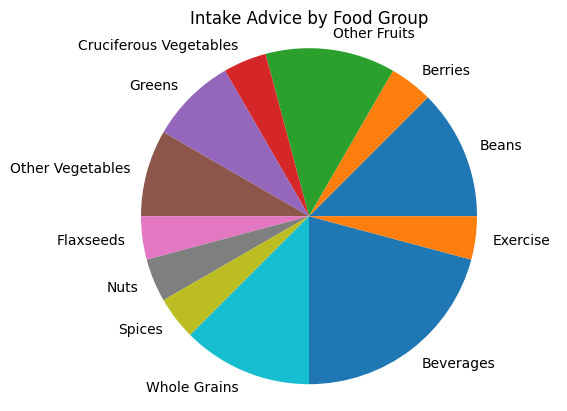

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

df_advice = pd.read_csv("/kaggle/input/daily-dozen-data/df_dd.csv")
(df_advice.head())

df_advice.plot(kind='pie', y='servings', labels=df_advice['food_group'],  legend=False)
plt.ylabel('')
plt.title('Intake Advice by Food Group')
plt.axis('equal') 

How does this compare to my intake? Using the Daily Dozen App, I tracked my intake of the different categories over some weeks. Here is the data: 

In [79]:
import json 

json_file_path = '/kaggle/input/daily-dozen-json/dailydozen_backup-4.json'

# Read the JSON file into a DataFrame`
dd_data = pd.read_json(json_file_path, lines=True)
dd_data = dd_data.drop("tweaks", axis=1)
dd_data = dd_data.drop("eveningWeight", axis=1)
dd_data = dd_data.drop("morningWeight", axis=1)

# Display the DataFrame
print(dd_data.head())

       Date                                         dailyDozen
0  20240102  {'Spices': 1, 'Whole Grains': 1, 'Other Fruits...
1  20240103  {'Spices': 1, 'Whole Grains': 1, 'Other Fruits...
2  20240104  {'Spices': 1, 'Whole Grains': 1, 'Other Fruits...
3  20240105  {'Spices': 1, 'Whole Grains': 3, 'Other Fruits...
4  20240106  {'Spices': 1, 'Whole Grains': 2, 'Other Fruits...


First, let's clean the data and load it into an Pandas' DataFrame. 

In [80]:
def json_to_dataframe(df, keys): 
    new_df = pd.json_normalize(df['dailyDozen'])
    new_df[keys] = new_df[keys]

new_keys = ["Spices", "Whole Grains", "Other Fruits", "Nuts", "Beans", "Cruciferous Vegetables", "Flaxseeds", "Other Vegetables", "Beverages", "Berries", "Exercise", "Greens"]   

for key in new_keys:
    dd_data[key] = pd.json_normalize(dd_data['dailyDozen'])[key]
        
dd_data = dd_data.drop(columns='dailyDozen')
dd_data.head()

,Date,Spices,Whole Grains,Other Fruits,Nuts,Beans,Cruciferous Vegetables,Flaxseeds,Other Vegetables,Beverages,Berries,Exercise,Greens
0,20240102,1,1,1,1,1,0,0,2,5,1,0,0
1,20240103,1,1,2,1,1,1,0,2,5,1,1,1
2,20240104,1,1,0,1,3,1,0,2,4,1,0,0
3,20240105,1,3,0,1,3,1,0,2,4,1,0,0
4,20240106,1,2,1,1,3,0,1,2,5,1,1,0


Now that the data is in the DataFrame, let's check the datatypes and change where necessary. 

In [81]:
dd_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 0 to 42
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Date                    43 non-null     int64
 1   Spices                  43 non-null     int64
 2   Whole Grains            43 non-null     int64
 3   Other Fruits            43 non-null     int64
 4   Nuts                    43 non-null     int64
 5   Beans                   43 non-null     int64
 6   Cruciferous Vegetables  43 non-null     int64
 7   Flaxseeds               43 non-null     int64
 8   Other Vegetables        43 non-null     int64
 9   Beverages               43 non-null     int64
 10  Berries                 43 non-null     int64
 11  Exercise                43 non-null     int64
 12  Greens                  43 non-null     int64
dtypes: int64(13)
memory usage: 4.7 KB


In [82]:
from datetime import datetime

dd_data["Date"] = pd.to_datetime(dd_data["Date"].astype(str), format='%Y%m%d')

In [83]:
dd_data.head()

,Date,Spices,Whole Grains,Other Fruits,Nuts,Beans,Cruciferous Vegetables,Flaxseeds,Other Vegetables,Beverages,Berries,Exercise,Greens
0,2024-01-02,1,1,1,1,1,0,0,2,5,1,0,0
1,2024-01-03,1,1,2,1,1,1,0,2,5,1,1,1
2,2024-01-04,1,1,0,1,3,1,0,2,4,1,0,0
3,2024-01-05,1,3,0,1,3,1,0,2,4,1,0,0
4,2024-01-06,1,2,1,1,3,0,1,2,5,1,1,0


Now that our data has the correct data type, it is ready for analysis. 
The first obvious question to ask is: how much does the intake (percentage wise) change over time? Let's try plotting the date onto a line chart. 

In [84]:
import matplotlib.pyplot as plt

def intake_over_time(df_eaten, df_dd):
    plt.figure(figsize=(30, 6))

    for fg in df_dd['food_group']:
        plt.plot(df_eaten['Date'], (df_eaten[fg] / df_dd.loc[df_dd['food_group'] == fg, 'servings'].iloc[0]), label=fg)

    plt.title('Foodgroup Intake over Time')
    plt.legend()
    plt.show()

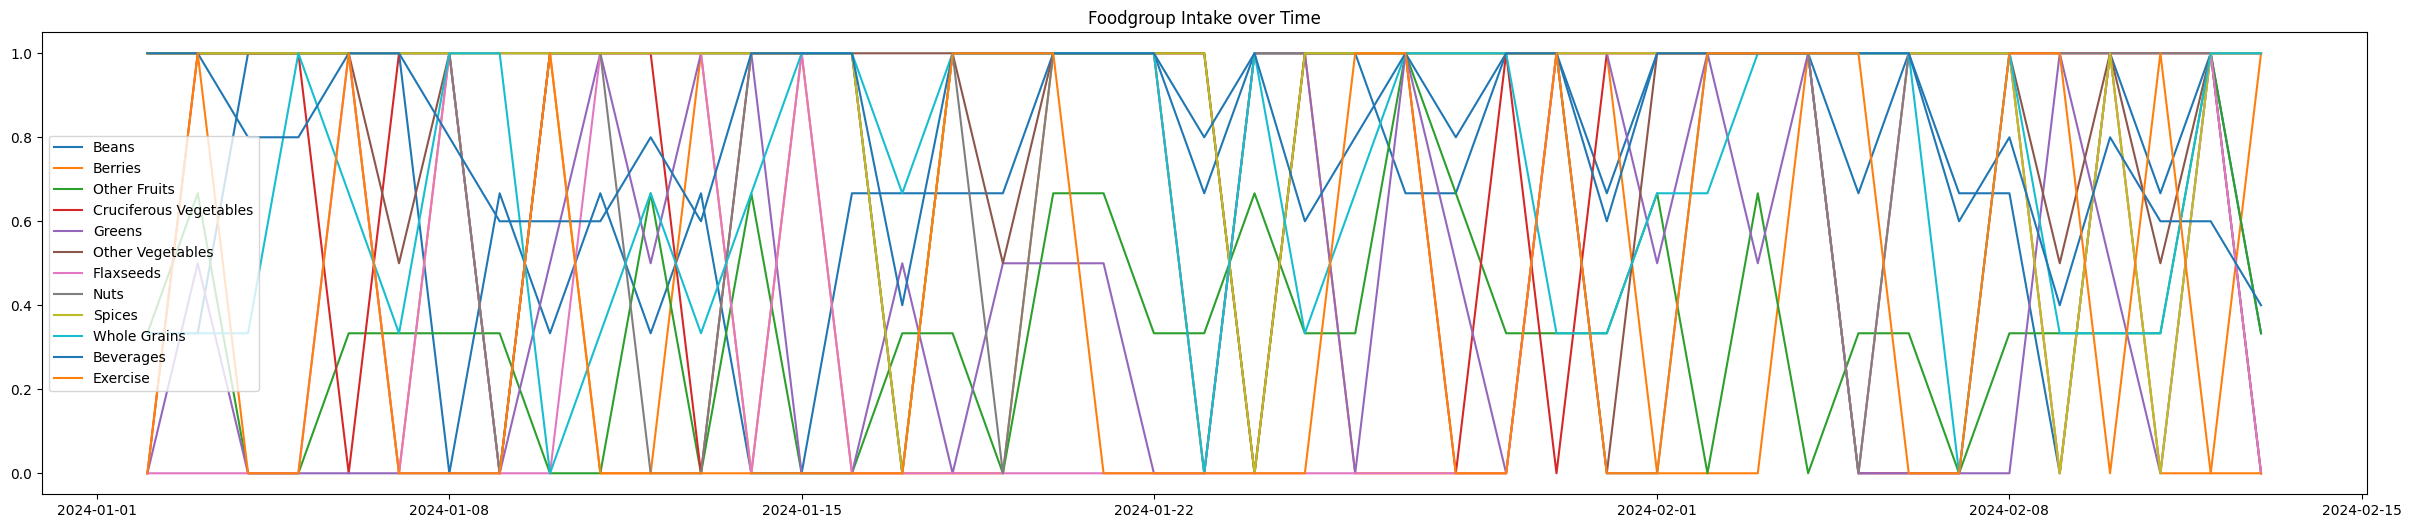

In [85]:
intake_over_time(dd_data,df_advice)

A couple things can be noted here: firstly, the graph is very chaotic. Due to the relatively short timespan, a line chart is not very insightful yet. Secondly, given that the plot contains 11 lines, it is difficult to even track a single line with your eyes. Thirdly, it does communicate some information: my intake of different foodgroups over time fluctuates quite a lot. Let's try and find a viz that is able to display that a bit more clearly. 

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

def intake_over_time_heatmap(df_eaten, df_dd):
    # Create a copy of df_eaten to avoid modifying the original DataFrame
    df = df_eaten.copy()
    
    for col in df.columns[1:]:  
        servings_row = df_dd[df_dd['food_group'] == col]
        if not servings_row.empty:
            servings = servings_row.iloc[0]['servings']
            df[col] = df[col] / servings * 100
        else:
            # Handle the case where no matching row is found in df_dd
            print(f"No servings information found for food group '{col}'")
    
    df.set_index('Date', inplace=True)
    
    plt.figure(figsize=(30, 10))
    sns.heatmap(df.T, cmap='coolwarm', annot=True, fmt=".1f")
    
    plt.xlabel('Date')
    plt.ylabel('Food Group')
    plt.title('Percentage-wise Intake of Different Food Groups Over Time')
    
    plt.show()

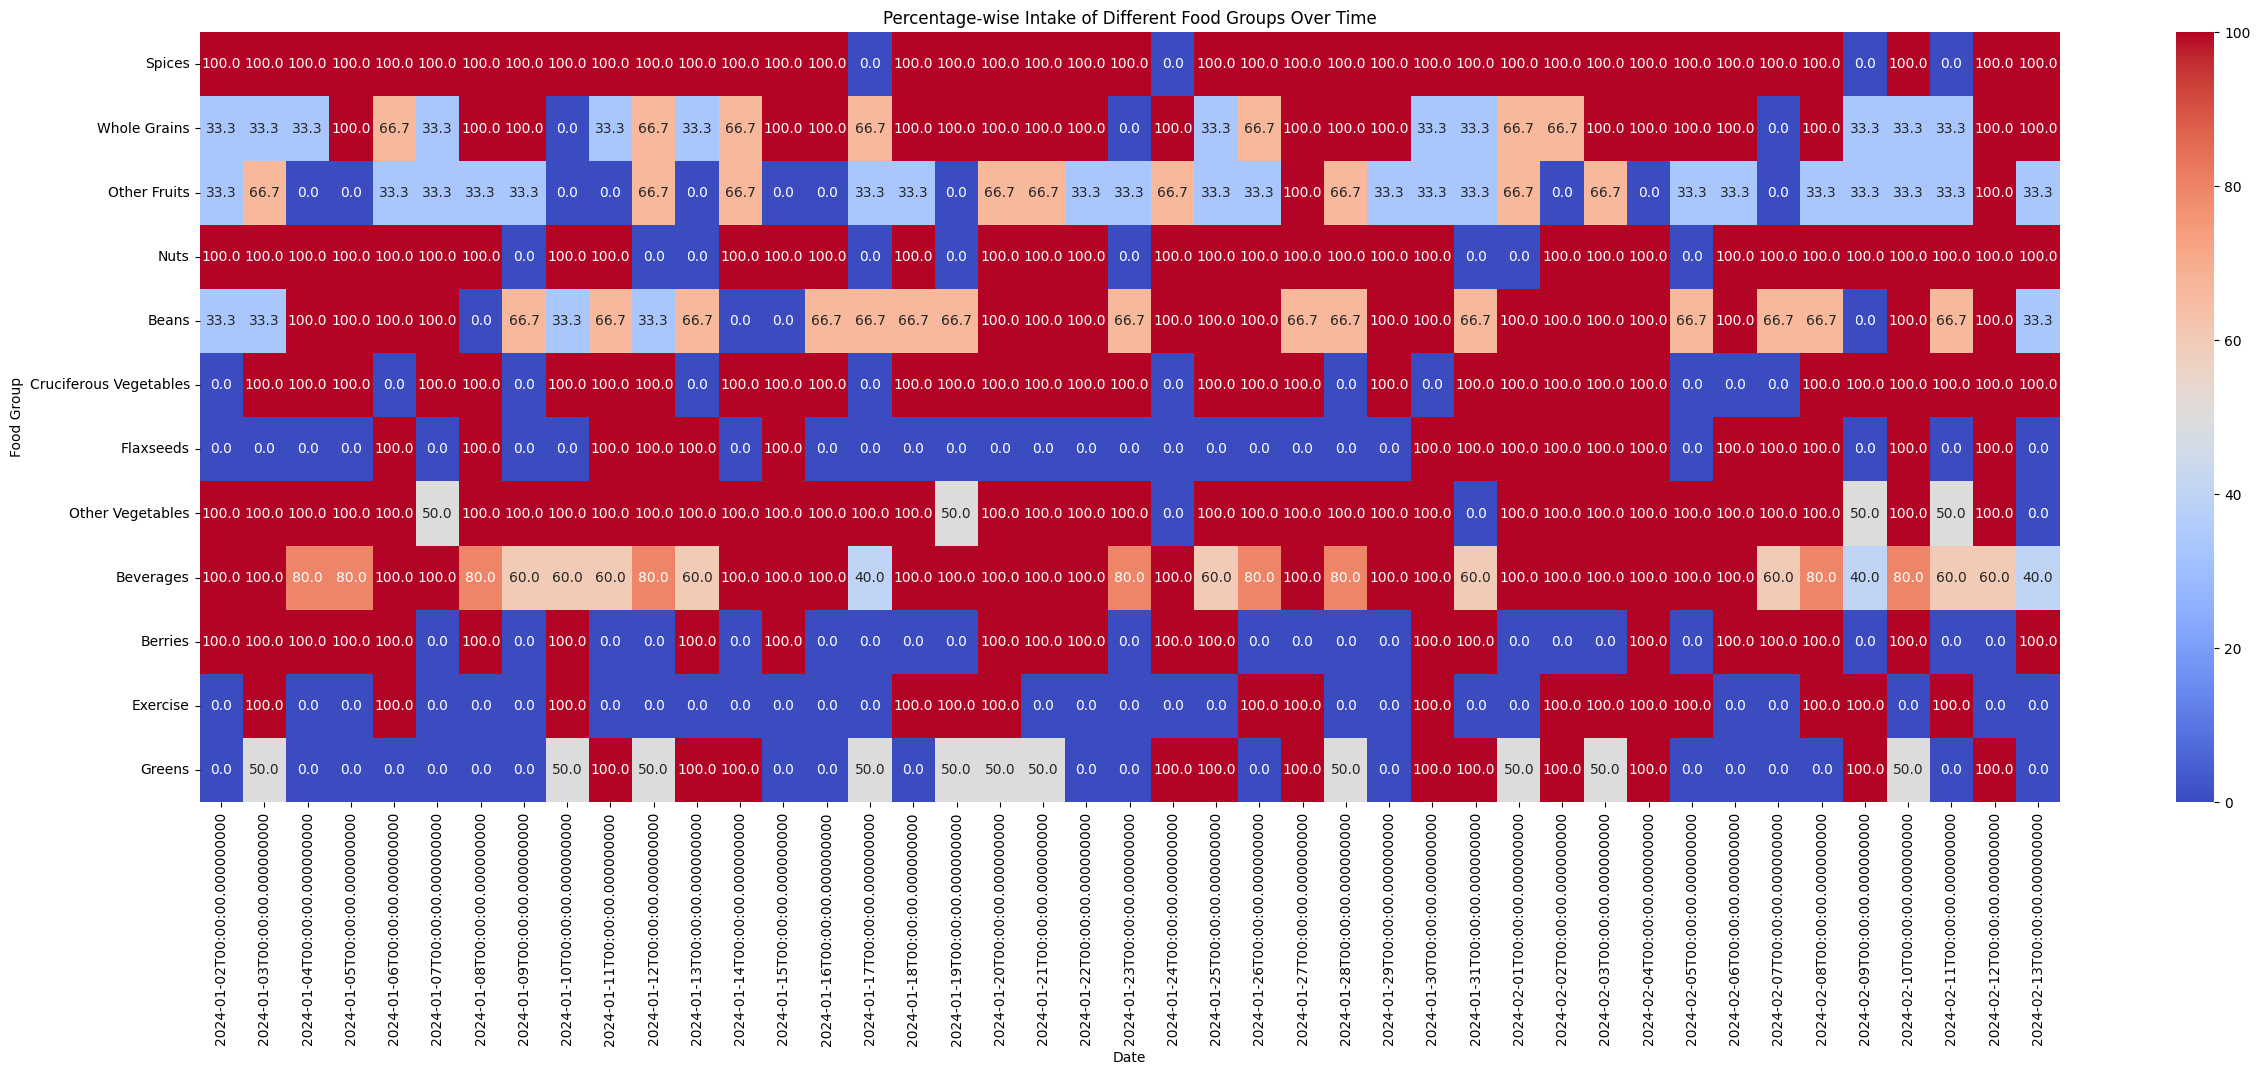

In [126]:
intake_over_time_heatmap(dd_data, df_advice)

This is already a lot clearer. Here it's easy to see that e.g. Spices has a very consistent intake, reaching the full amount adviced almost every day, with exception of only a few instances. Other foodgroups, like e.g. Other Fruits, have a way less consistent intake, signaling that I still have some work in that area. 

Let's now try to single out a few foodgroups, to  go more into depth. 

In [88]:
def intake_over_time_single(df_eaten, df_dd, fg):
    plt.figure(figsize=(15, 6))
    plt.plot(df_eaten['Date'], (df_eaten[fg] / df_dd.loc[df_dd['food_group'] == fg, 'servings'].iloc[0]), label=fg)
    plt.title(f' {fg} Intake over Time')
    plt.legend()
    plt.show()

Let's have a look at Spices and Berries. 

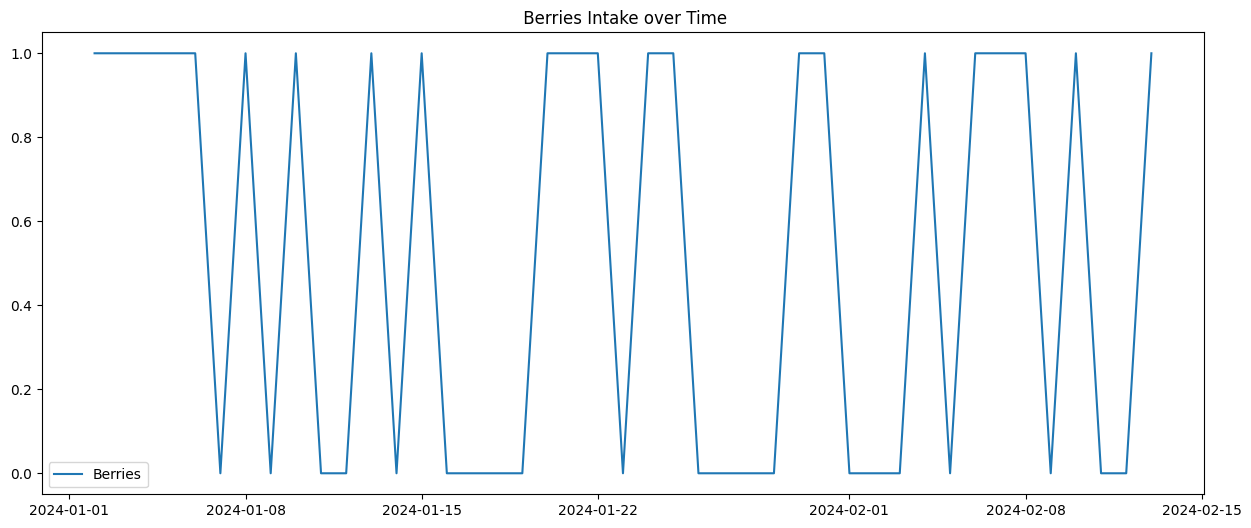

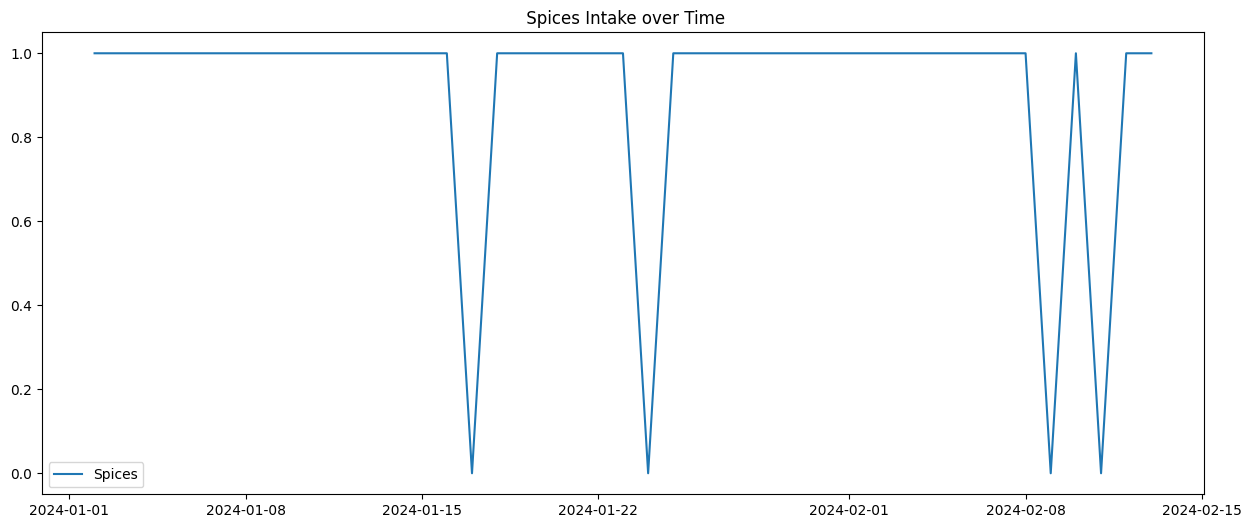

In [89]:
intake_over_time_single(dd_data, df_advice, "Berries")
intake_over_time_single(dd_data, df_advice, "Spices")

Unsurprisingly, Spices has a more consitent intake then Berries. Let's check Beverages. 

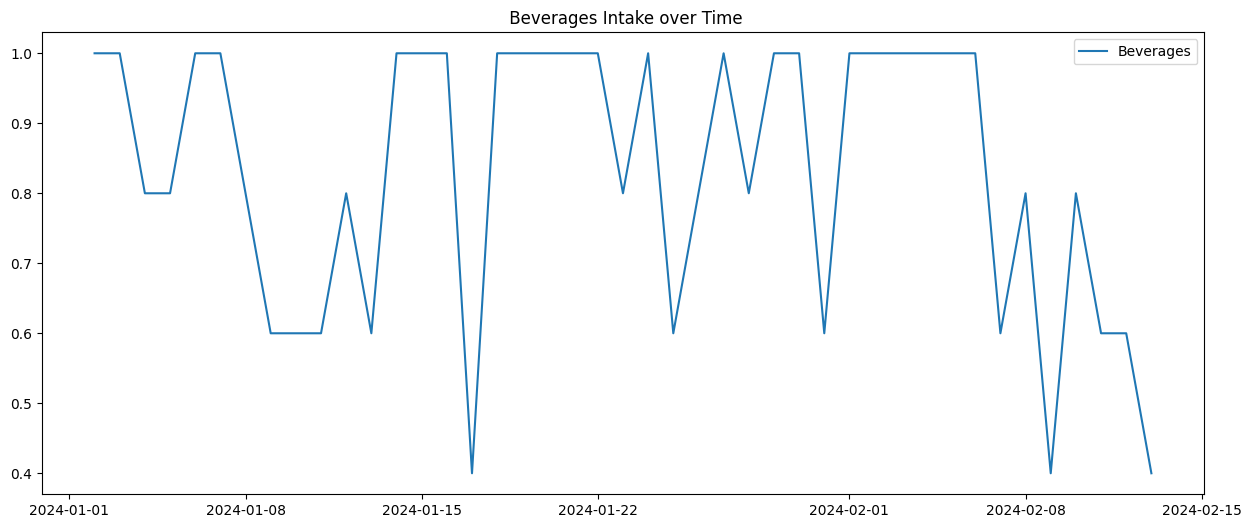

In [90]:
intake_over_time_single(dd_data, df_advice, "Beverages")

Even my beverages intake a day (5 servings recommended) is not very consistent. Again, signaling the need to make an effort in that area. I will get to the learnings of the analysis later on. 

So far, I have only looked at the intake of foodgroups over time. Let's try and find out, whether the day of the week has an impact on foodgroup intake. 

In [91]:
dd_data['day_of_week'] = dd_data['Date'].dt.day_name()

In [92]:
def intake_per_day_single(df_eaten, df_dd, fg):
    
    #y should the percentage of intake reached
    #x_labels should be the days of the week
    plt.figure(figsize=(15, 6))

    x_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    y = (df_eaten[fg].groupby(df_eaten["day_of_week"]).mean().reindex(x_labels)) / df_dd.loc[df_dd['food_group'] == fg, 'servings'].iloc[0]
    
    plt.bar(x_labels, y, color='skyblue')
    plt.title(f'{fg}: Weekly Intake')
    plt.ylim(0, 1)
    plt.show()

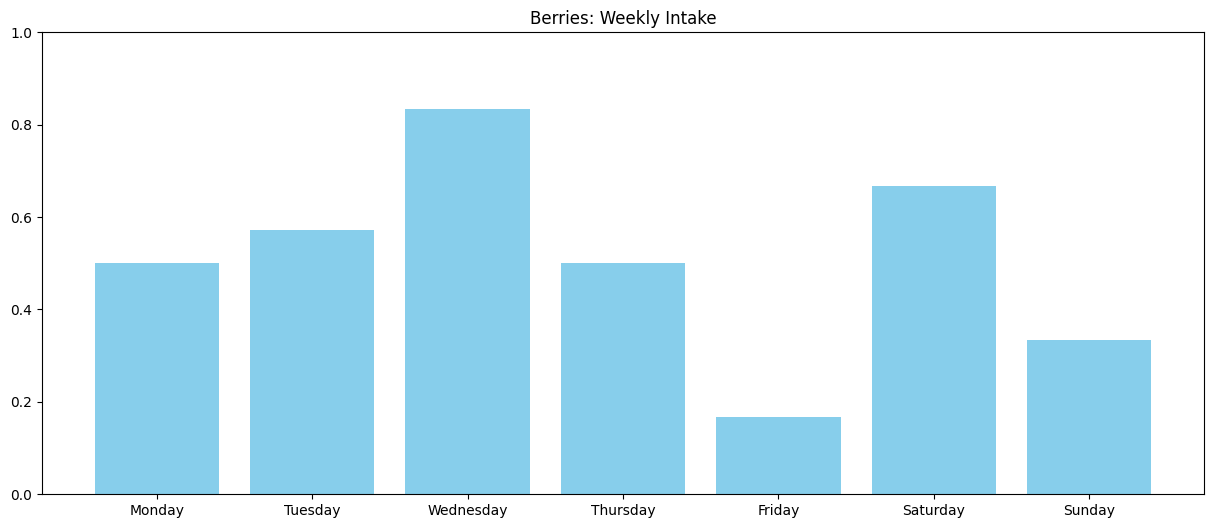

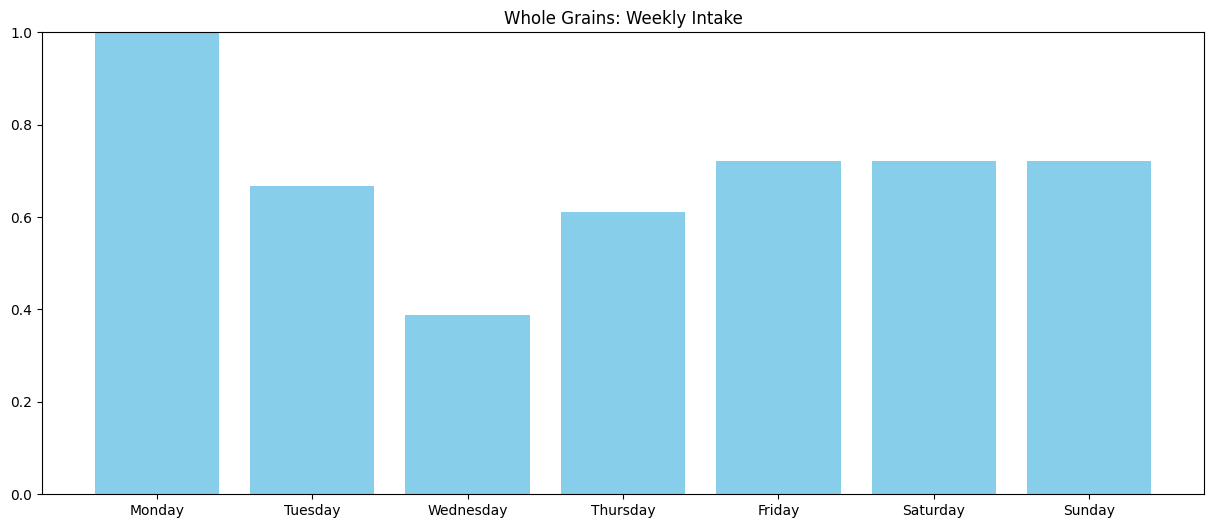

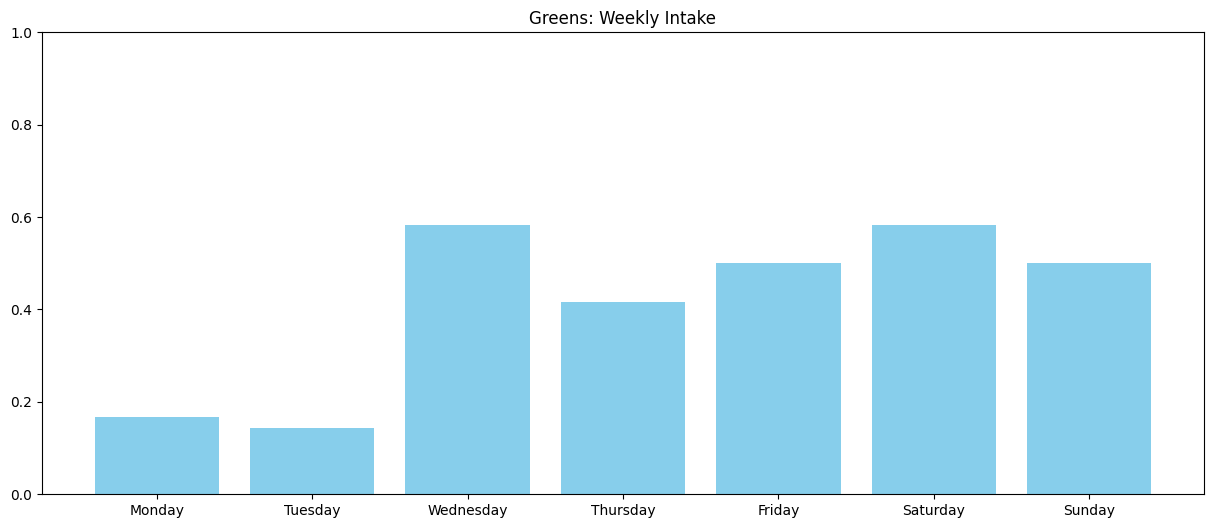

In [93]:
intake_per_day_single(dd_data, df_advice, "Berries")
intake_per_day_single(dd_data, df_advice, "Whole Grains")
intake_per_day_single(dd_data, df_advice, "Greens")

Cleary, Friday is a bad day for Berries. A possible explanation would be that I buy new berries on Saturday and might run out more often on Fridays. Let's have a look at Greens. 
Whole Grain intake dips on Wednesdays, while it stays relatively stable throughout the rest of the week. For Greens, Monday and Tuesday stand out immediately, whereas the rest of the week seems to have a stable intake. 

Though Friday is a bad day for Berries, it is a decent day for Whole Grains. Monday is a great day for Whole Grains, but Greens intake is very poor. So far, days seem to have a local impact, but not in a consistent way throughout different foodgroups.  

Let's see whether comparing two foodgroups directly can lead to some insights. E.g. Given that Berries are a fruit too, is there any correlation? 

In [94]:
import matplotlib.pyplot as plt
import numpy as np

def compare_foodgroup_intake(df_eaten, df_dd, fg1, fg2):
    plt.figure(figsize=(20, 6))
    
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    bar_width = 0.4
    
    x_values_fg1 = np.arange(len(day_order))
    x_values_fg2 = x_values_fg1 + bar_width
    
    percentage_intake_fg1 = (df_eaten[fg1].groupby(df_eaten["day_of_week"]).mean().reindex(day_order)) / df_dd.loc[df_dd['food_group'] == fg1, 'servings'].iloc[0]
    
    percentage_intake_fg2 = (df_eaten[fg2].groupby(df_eaten["day_of_week"]).mean().reindex(day_order)) / df_dd.loc[df_dd['food_group'] == fg2, 'servings'].iloc[0]
    plt.bar(x_values_fg1, percentage_intake_fg1.values, width=bar_width, label=fg1)
    
    plt.bar(x_values_fg2, percentage_intake_fg2.values, width=bar_width, label=fg2)
    
    plt.xlabel('Day of the Week')
    plt.ylabel('Percentage of Intake Reached')
    plt.title('Weekly Intake Comparison for Food Groups')
    
    plt.xticks(np.arange(len(day_order)) + 0.5 * bar_width, day_order)
    
    plt.ylim(0, 1)
    
    plt.legend()
    
    plt.show()

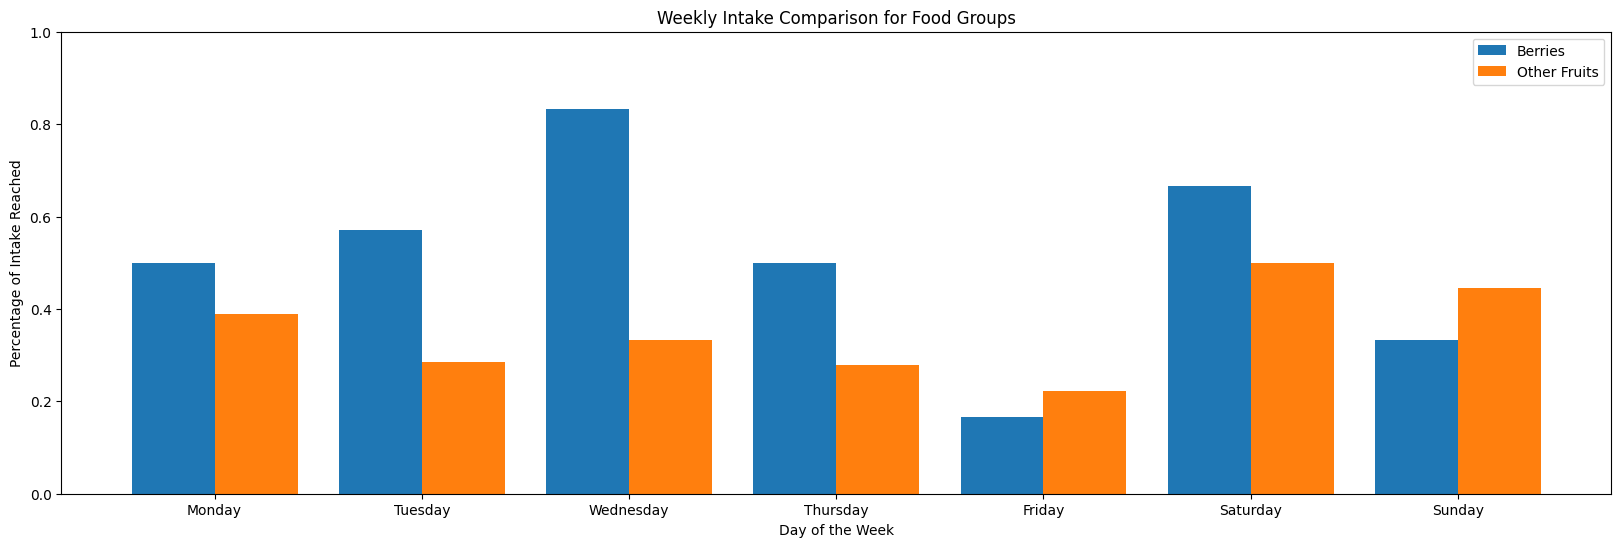

In [95]:
compare_foodgroup_intake(dd_data, df_advice, "Berries", "Other Fruits")

These visiuals have provided preliminary insights in the data. Let's have a closer look at the actual numbers to answer a few more specific questions. 

For example: What are the foodgroups with the lowest and highest overall intake? 

In [101]:
dd_data.drop(columns=["day_of_week"], inplace=True)

In [134]:
def mean_per_foodgroup(df_eaten, df_dd):
    mean_per_foodgroup = []
    food_group = []
    df = df_eaten.copy()

    for col in df.columns[1:]:
        servings_row = df_dd[df_dd['food_group'] == col]
        
        if not servings_row.empty:
            servings = servings_row.iloc[0]['servings']
            
            df[col] = df[col] / servings * 100
        
        intake_for_fg = np.sum(df[col])
        
        mean_intake_percentage = intake_for_fg / len(df) 
        
        mean_per_foodgroup.append(mean_intake_percentage)
        food_group.append(col)
    
    result_df = pd.DataFrame({'food_group': food_group, 'mean': mean_per_foodgroup})
    
    return result_df

In [141]:
mean_per_foodgroup(dd_data, df_advice).sort_values("mean")

,food_group,mean
2,Other Fruits,34.883721
10,Exercise,37.209302
6,Flaxseeds,39.534884
11,Greens,40.697674
9,Berries,51.162791
1,Whole Grains,68.992248
4,Beans,71.317829
5,Cruciferous Vegetables,74.418605
3,Nuts,79.069767
8,Beverages,83.255814


Here, it becomes clear that the foodgroups with the best intake are Spices, Other Vegetables and Beverages. Worst are Other Fruits, Flaxseeds and Greens, if we put Exercise aside for a second. But also for Berries, there is a lot of improvement possible.  



To get more definite information, I need more data over a longer period of time. 

So far though, I have been able to get some preliminary insights. 
- Generally I have to focus more on eating Berries, Flaxseeds, Greens and Other Fruits, being the foodgroups with the lowest average. 
- I should focus on moving more, building in Exercise more regularly. (e.g. Biking to work might help!) 
- Though my Beverages intake is high considering it's ranks third, it should be achievable to drink 5 servings a day. That I do not reach this, signals that there is a lot of improvement possible. (e.g. Bring water more regularly on outings, drink a glass of water before going to bed, etc). 
- For those foodgroups that have a low intake all througout the week (e.g. Greens), it would be best to plan it into my mealplan, making sure the ingredients are available for eating anytime. 


Let's see what I can find out in a few weeks / months, when I have more data! 